# Performance metrics 

#### Mean Loss: 
This indicates the average loss (often measured as cross-entropy loss or mean squared error) calculated over all samples in the test set. A lower mean loss generally indicates better performance of the model in terms of its ability to minimize prediction errors.

#### PCK 0.05: 
PCK stands for Percentage of Correct Keypoints. It's a commonly used metric in computer vision tasks, especially for evaluating the accuracy of pose estimation models. In your case, PCK@0.05 indicates the percentage of correctly estimated keypoints when the error threshold is set to 5% of the image size. For example, if a keypoint falls within 5% of the image size from its ground truth position, it's considered a correct estimation.

#### NE
NE is defined as the average normalized Euclidean distance between the ground-truth keypoints and the predictions in pixels, normalized by the diagonal of the input image. The predicted keypoints correspond to the position of the maximum values in each of the predicted heatmaps by the network

#### NEavg: 
This stands for Normalized Error averaged over all keypoints. It's another measure of accuracy in pose estimation tasks. Normalized Error is the Euclidean distance between the predicted keypoint and the ground truth keypoint, normalized by a reference length (often a fraction of the image diagonal). NEavg calculates the average normalized error across all keypoints in the dataset. A lower NEavg value indicates better accuracy.


#### preds.csv file
When reading the preds.csv file: you see the actual keypoints coordinates and the predicted ones. these coordinates are all given in the frame 288/4 x 384/4.                                                                              
to transfer to the 288x384 (which gives the image and keypoints after all transformation) just *4

#### vis_enabled='True' or 'False':
when setting it to True it meanes: use visiblity status labels. given by 0,1 and -1.                        
when setting it to False it meanes: do not use the vis stautes labels. Here it uses all the lables eventhough they are not visible. 

In [6]:
"""import os
import sys
import torch"""
#from torch.utils.data import Dataset
#from pathlib import Path



# Import testdata
One test dataset for all models

In [1]:

from roboflow import Roboflow
rf = Roboflow(api_key="4OjSveCt789COMTrXHRO")
project = rf.workspace("nabil-vrif8").project("testdata-gg6a1")
version = project.version(1)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to testdata-1 in yolov5pytorch:: 100%|██████████| 98/98 [00:00<00:00, 885.40it/s]


-----------------------------------------------------------------------------------------------------------------

# Preprocess the test data:

In [4]:
from utils.crop_imgs_preprocess import process_images
from utils.crop_imgs_preprocess import rename_images
from utils.crop_imgs_preprocess import rename_labels

image_folder = 'dataset/noMarker-1/test/images'
bbox_folder =  'dataset/noMarker-1/test/labels'
keypoints_file = 'dataset/noMarker-1/keypointNomarker.csv'
output_folder = 'dataset/noMarker-1/test/cropped_imgs'
KP_output_file = 'dataset/noMarker-1/test/modified_keypoints.csv'

original_image_size = (640, 640)


#First rename the images and bbox labels, because they have random names from RoboFlow:
#rename_images(image_folder)
#rename_labels(bbox_folder)

# Cropp the images and save them to a new folder and save the new adjusted keypoints to a new file:
#process_images(image_folder, output_folder, bbox_folder, keypoints_file,KP_output_file, original_image_size)

rgb666_17278.jpg 0
rgb666_5852.jpg 1
rgb333_19054.jpg 2
rgb444_9626.jpg 3
rgb444_9151.jpg 4
rgb333_16677.jpg 5
rgb666_6527.jpg 6
rgb555_1576.jpg 7
rgb444_4601.jpg 8
rgb444_8501.jpg 9
rgb666_6477.jpg 10
rgb555_5927.jpg 11
rgb444_1351.jpg 12
rgb333_8251.jpg 13
rgb666_7801.jpg 14
Error processing image rgb666_7801.jpg: too many indices for array: array is 1-dimensional, but 2 were indexed
rgb555_6427.jpg 15
rgb333_15027.jpg 16
rgb666_13301.jpg 17
rgb555_8826.jpg 18
rgb444_6327.jpg 19
Error processing image rgb444_6327.jpg: too many indices for array: array is 1-dimensional, but 2 were indexed
rgb333_4451.jpg 20
rgb333_7327.jpg 21
rgb333_11851.jpg 22
rgb333_5152.jpg 23
rgb666_3276.jpg 24
rgb333_2551.jpg 25
rgb555_14551.jpg 26
rgb555_13801.jpg 27
rgb555_6777.jpg 28
rgb333_13251.jpg 29
rgb333_21505.jpg 30
rgb666_14476.jpg 31
rgb666_14051.jpg 32
rgb666_1101.jpg 33
rgb666_6802.jpg 34
rgb333_901.jpg 35
rgb666_8726.jpg 36
rgb333_12076.jpg 37
rgb666_17178.jpg 38
rgb333_18003.jpg 39
rgb555_6077.jp

# Read the test dataset and plot an item


loading annotations from:  dataset/testdata-1/test/labels/labels.csv


100%|██████████| 46/46 [00:00<00:00, 880.02it/s]

keypoints before transforms: 
 [[  241.55   329.35]
 [  251.55   329.35]
 [  262.99   231.39]
 [  275.14   237.78]
 [   62.89    85.18]
 [   60.03    71.69]
 [-1908.09 -1350.74]
 [-6749.06 -4992.  ]]


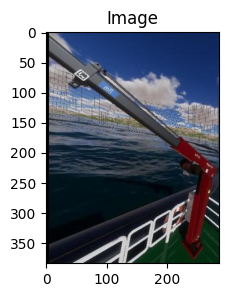

[[ 0.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 1.]
 [-1.]
 [-1.]]
[[ 0.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 1.]
 [-1.]
 [-1.]]


In [2]:
from utils.datasets import PoseDataset

dataset_dir = 'dataset/testdata-1/test'
dataset = PoseDataset(dataset_dir=dataset_dir, is_train=False, vis_enabled='True')
image, heatmaps_gt, target_weight, sample_data = dataset.__getitem__(3)
print(target_weight)
print(target_weight)

-----------------------------------------------------------------------------------------------------------------

# Run the testing on your model: 👌

In [5]:
#$ python val.py --dataset './datasets/eval/RealSet_test_debug' --weights './experiments/archived/Vis0_FDR_15k_best.pth' --pck_thr 0.05


#Set --vis_enable=True --> none-visible keypoints dont get prdicted
# it meanes: use visiblity status labels if enabled


!python val.py --dataset 'dataset/noMarker-1/test' --weights './logs/2000_no_markers/checkpoint_best_loss.pth' --pck_thr 0.05 --vis_enabled=True        


device:  cuda:0
Loading checkpoint ...
 ./logs/2000_no_markers/checkpoint_best_loss.pth 

Checkpoint's epoch:  20

loading annotations from:  dataset/noMarker-1/test/labels/labels.csv
100%|████████████████████████████████████████| 257/257 [00:00<00:00, 931.51it/s]
batch_size:  1
dataset length :  257
Evaluation:   0%|                                       | 0/257 [00:00<?, ?it/s]Evaluation:   0%|                                       | 0/257 [00:00<?, ?it/s]
Figure(300x300)
Figure(300x300)
Figure(300x300)
Evaluation:   0%|                               | 1/257 [00:01<04:56,  1.16s/it]Figure(300x300)
Figure(300x300)
Figure(300x300)
Evaluation:   2%|▍                              | 4/257 [00:01<01:02,  4.05it/s]Figure(300x300)
Figure(300x300)
Figure(300x300)
Evaluation:   3%|▊                              | 7/257 [00:01<00:33,  7.55it/s]Figure(300x300)
Figure(300x300)
Figure(300x300)
Evaluation:   4%|█▏                            | 10/257 [00:01<00:22, 11.14it/s]Figure(300x300)
Figure(30

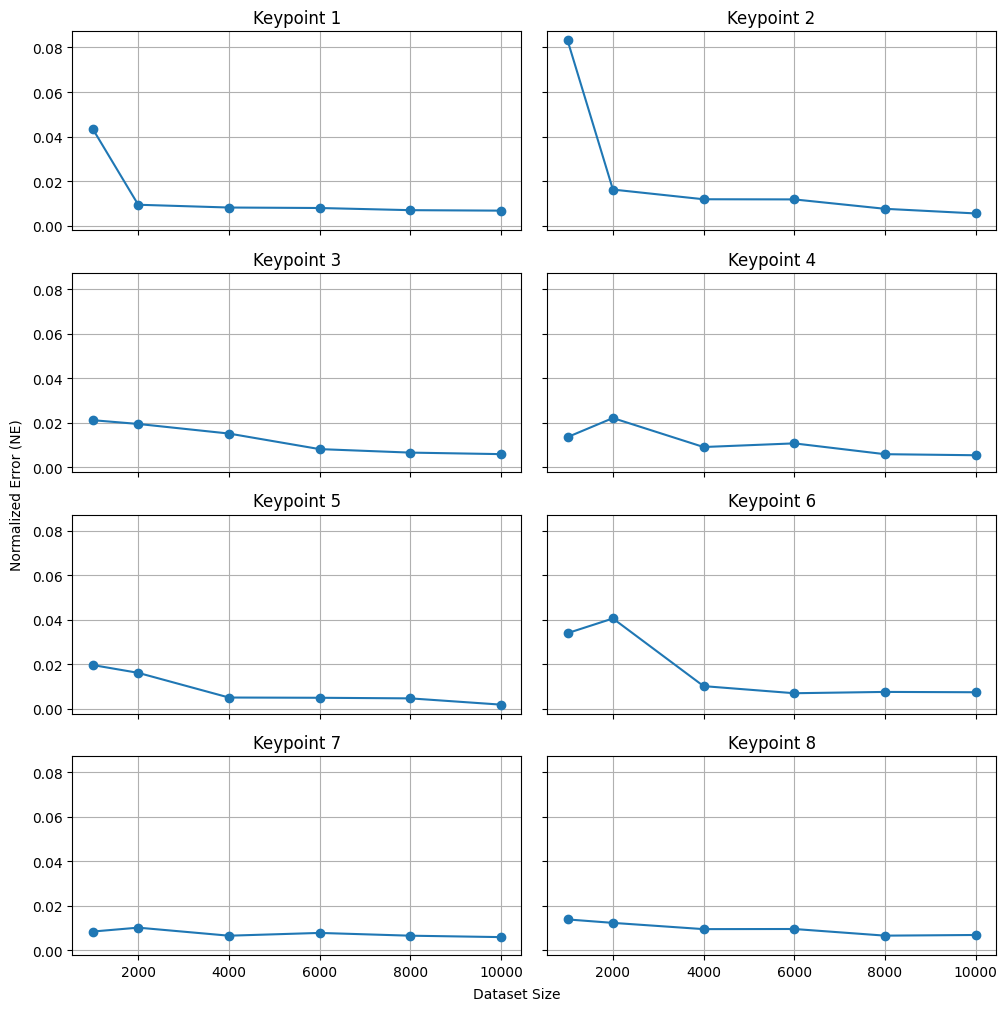

In [48]:
import matplotlib.pyplot as plt

# Data for each dataset size and corresponding NE for each keypoint
dataset_sizes = [1000, 2000, 4000, 6000, 8000, 10000]

keypoints_NE = {
    'NE1': [0.04334037192165847, 0.009386557464798264, 0.008141492687476154, 0.007926534201639376, 0.0069552815208832304, 0.0067410438787192],
    'NE2': [0.08317040563339277, 0.016204754378469174, 0.011853362034474063, 0.011786595918238121, 0.007565275322468477, 0.005487465876198916],
    'NE3': [0.02112472821027037, 0.019437064900994273, 0.01513036638498303, 0.008145640753209565, 0.0065749759227037245, 0.005892428494989853],
    'NE4': [0.013545127500864557, 0.022088811140168755, 0.009081700139424977, 0.010719911872663242, 0.005863146052103114, 0.005392450585283982],
    'NE5': [0.019656632772900806, 0.016159560997039045, 0.005081143145534096, 0.00497087802399286, 0.004702353257347214, 0.0018939424983479636],
    'NE6': [0.033986206445842944, 0.04056827435269949, 0.01019945992156859, 0.0070118427276611, 0.007601098623126715, 0.007455382309854],
    'NE7': [0.008490814710967203, 0.010232433366278763, 0.006619616993702913, 0.007863737759180334, 0.006621897686272828, 0.005987029833098217],
    'NE8': [0.01391972830662357, 0.01237636933533043, 0.009568875798812247, 0.009625659324228746, 0.006644709322314977, 0.006941299742230992]
}

# Plotting NE for each keypoint against dataset size in separate figures with shared axes
keypoints = list(keypoints_NE.keys())
num_keypoints = len(keypoints)
num_cols = 2
num_rows = (num_keypoints + 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.5)

for i, ax in enumerate(axs.flat):
    if i < num_keypoints:
        keypoint = keypoints[i]
        ax.plot(dataset_sizes, keypoints_NE[keypoint], marker='o')
        ax.set_title(f'Keypoint {keypoint[2:]}')
        ax.grid(True)

# Adding axis labels for the entire figure
fig.text(0.5, 0, 'Dataset Size', ha='center', va='center')
fig.text(0, 0.5, 'Normalized Error (NE)', ha='center', va='center', rotation='vertical')

plt.tight_layout()

plt.show()


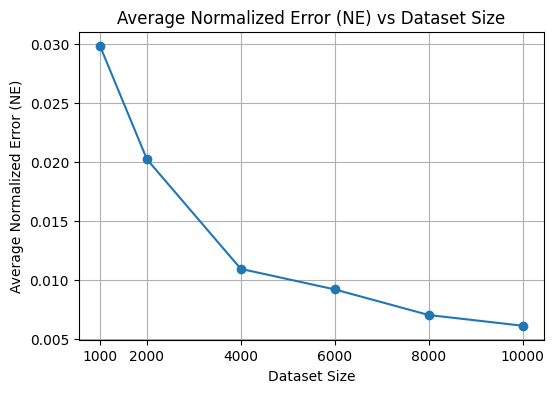

In [37]:
import matplotlib.pyplot as plt

# Data for each dataset size and corresponding NE for each keypoint
dataset_sizes = [1000, 2000, 4000, 6000, 8000, 10000]

NE_values = {
    1000: 0.02981515003913044, #Dette er fra Old_1000
    2000: 0.02021449978478261,#0.03813225075434783, #Bruker den fra test_1000_imgs her
    4000: 0.010942805536956523,
    6000: 0.009205065919565217,
    8000: 0.007039655297826085,
    10000: 0.006134425339130435
}

# Extract NE values for each dataset size
NE_avg = [NE_values[size] for size in dataset_sizes]

# Plotting average NE against dataset size
plt.figure(figsize=(6, 4))
plt.plot(dataset_sizes, NE_avg, marker='o')
plt.title('Average Normalized Error (NE) vs Dataset Size')
plt.xlabel('Dataset Size')
plt.ylabel('Average Normalized Error (NE)')
plt.xticks(dataset_sizes)
plt.grid(True)
plt.show()


# Plot the Gt and preds keypoints:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_keypoints(row, vis_enable=False):
    plt.figure(figsize=(5, 3))
    
    # Initialize lists for ground truth and predicted keypoints with visibility consideration
    gt_x, gt_y, pred_x, pred_y = [], [], [], []
    
    for i in range(1, 9):
        v = row[f'v{i}']
        # Check visibility if vis_enable is True
        if not vis_enable or (vis_enable and v == 1):
            gt_x.append(row[f'x{i}'] * 4)  # Scale by 4
            gt_y.append(row[f'y{i}'] * 4)  # Scale by 4
            pred_x.append(row[f'x{i}_pred'] * 4)  # Scale by 4
            pred_y.append(row[f'y{i}_pred'] * 4)  # Scale by 4
    
    # Plot ground truth keypoints
    if gt_x and gt_y:  # Check if lists are not empty
        plt.scatter(gt_x, gt_y, c='red', label='Ground Truth')
    
    # Plot predicted keypoints
    if pred_x and pred_y:  # Check if lists are not empty
        plt.scatter(pred_x, pred_y, c='blue', label='Predicted',  marker='*')
    
    # Extracting the image ID from the row
    img_id = row['imgId']
    
    plt.title(f'Ground Truth vs Predicted Keypoints for {img_id}')
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.legend()
    plt.gca().invert_yaxis()  # Invert y-axis
    plt.show()

# Example of using the modified function with visibility enabled
"""vis_enabled = True

df = pd.read_csv('runs/val/test_4000_imgs/preds.csv')

for index, row in df.iterrows():
    plot_keypoints(row, vis_enable=vis_enabled)"""


"vis_enabled = True\n\ndf = pd.read_csv('runs/val/test_4000_imgs/preds.csv')\n\nfor index, row in df.iterrows():\n    plot_keypoints(row, vis_enable=vis_enabled)"

# Compare the NE for the two models trained on datasetset with and without aruco markers

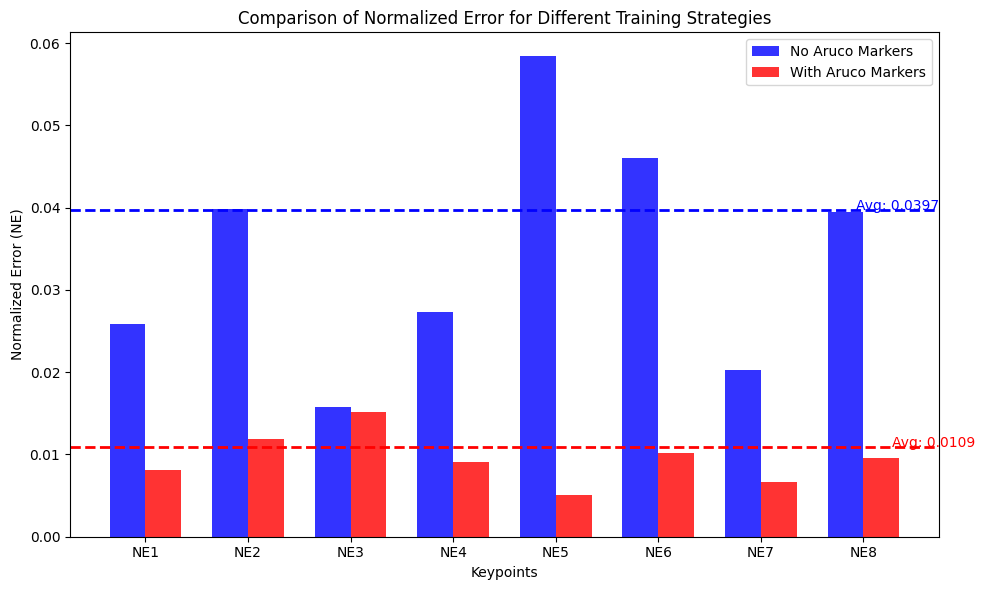

In [15]:
import matplotlib.pyplot as plt
import numpy as np

#no_markers
strategy1_NE = [0.02589887316313989, 0.03982812094442337, 0.015728099065542674, 0.027294146434332273, 0.05838254747213791, 0.04606197406848268, 0.020276696512811453, 0.03951253857689369]


#with_markers
#strategy2_NE = [0.046212053663718146, 0.07332271763256613, 0.035434813350439034, 0.02468376492404122, 0.03720164641907265, 0.03114776005968447, 0.023297550428348242, 0.03540364051094417]
#(4000)
strategy2_NE = [0.008141492687476154, 0.011853362034474063, 0.01513036638498303, 0.009081700139424977, 0.005081143145534096, 0.01019945992156859, 0.006619616993702913, 0.009568875798812247]



# Calculate the average NE for each strategy
avg_strategy1_NE = 0.03974
avg_strategy2_NE = 0.01094

# List of keypoints
keypoints = ['NE1', 'NE2', 'NE3', 'NE4', 'NE5', 'NE6', 'NE7', 'NE8']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot NE for each keypoint for both strategies
bar_width = 0.35
index = np.arange(len(keypoints))
opacity = 0.8

rects1 = ax.bar(index, strategy1_NE, bar_width, alpha=opacity, color='b', label='No Aruco Markers')
rects2 = ax.bar(index + bar_width, strategy2_NE, bar_width, alpha=opacity, color='r', label='With Aruco Markers')

# Plot average NE for both strategies
ax.axhline(y=avg_strategy1_NE, color='b', linestyle='--', linewidth=2)
ax.text(index[-1] + 0.1, avg_strategy1_NE, f'Avg: {avg_strategy1_NE:.4f}', color='b', fontsize=10 )

ax.axhline(y=avg_strategy2_NE, color='r', linestyle='--', linewidth=2)
ax.text(index[-1] + bar_width + 0.1, avg_strategy2_NE, f'Avg: {avg_strategy2_NE:.4f}', color='r', fontsize=10)

ax.set_xlabel('Keypoints')
ax.set_ylabel('Normalized Error (NE)')
ax.set_title('Comparison of Normalized Error for Different Training Strategies')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(keypoints)
ax.legend()

plt.tight_layout()
plt.show()

metric = 'NE'

----------------------------------------------------------------------------------------------------------------------------

# Test on images with crane detected using YOLOv5
#### This model is trained on 2000 images with bbox labels detected using Yolov5

In [19]:
!python val.py --dataset 'dataset/testdata-1/test' --weights './logs/yolov5_detected_crane/checkpoint_best_loss.pth' --pck_thr 0.05 --vis_enabled=True        

#result saved to: runs/val/yolov5_detected_crane

device:  cuda:0
Loading checkpoint ...
 ./logs/yolov5_detected_crane/checkpoint_best_loss.pth 

Checkpoint's epoch:  13

loading annotations from:  dataset/testdata-1/test/labels/labels.csv
100%|██████████████████████████████████████████| 46/46 [00:00<00:00, 971.14it/s]
batch_size:  1
dataset length :  46
Evaluation:   0%|                                        | 0/46 [00:00<?, ?it/s]Evaluation:   0%|                                        | 0/46 [00:00<?, ?it/s]
Figure(300x300)
Figure(300x300)
Figure(300x300)
Evaluation:   2%|▋                               | 1/46 [00:01<00:55,  1.23s/it]Figure(300x300)
Figure(300x300)
Figure(300x300)
Evaluation:   9%|██▊                             | 4/46 [00:01<00:10,  3.83it/s]Figure(300x300)
Figure(300x300)
Figure(300x300)
Figure(300x300)
Evaluation:  17%|█████▌                          | 8/46 [00:01<00:04,  8.16it/s]Figure(300x300)
Figure(300x300)
Figure(300x300)
Figure(300x300)
Evaluation:  26%|████████                       | 12/46 [00:01<00:02

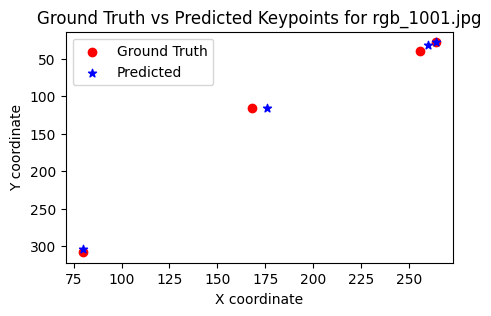

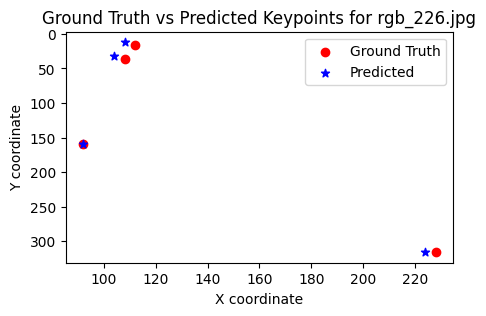

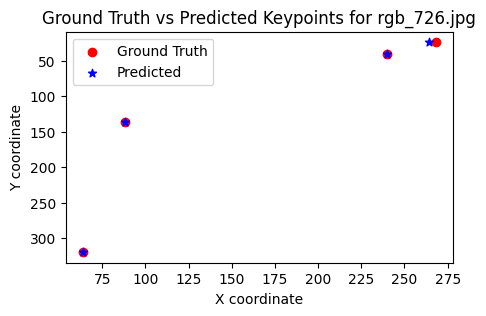

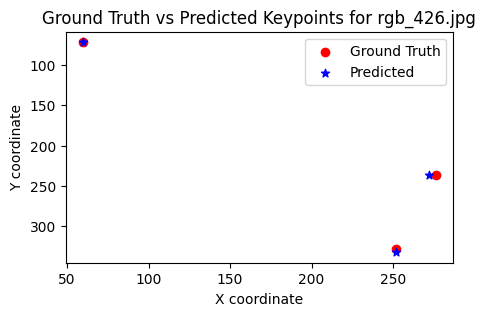

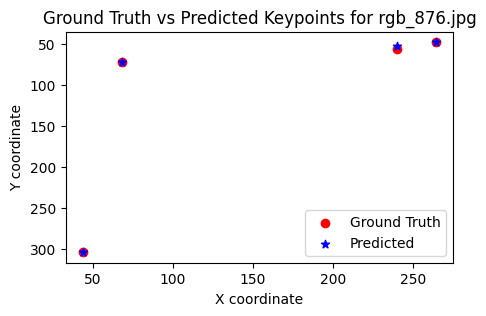

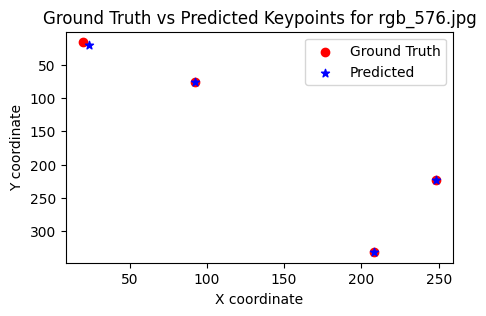

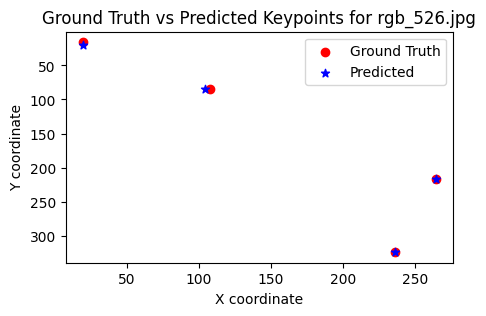

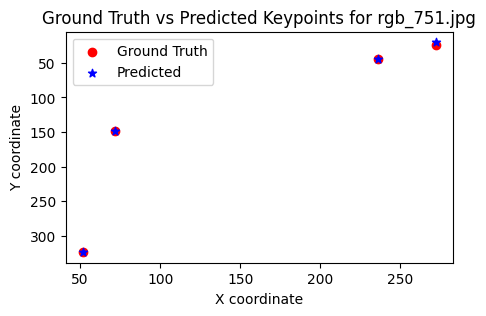

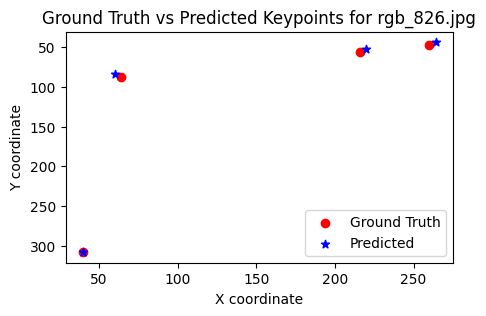

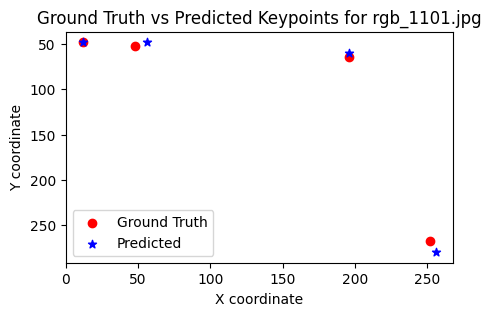

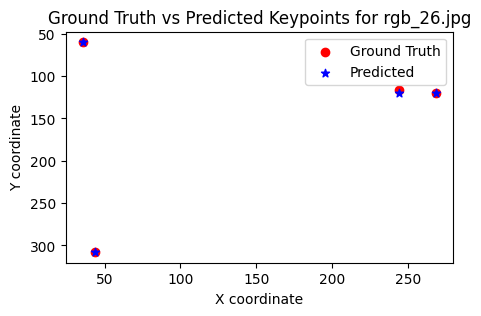

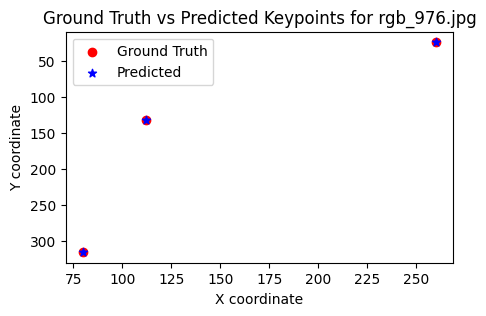

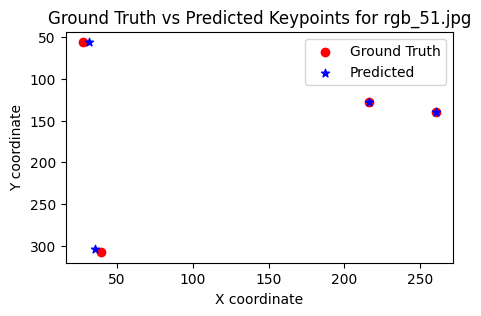

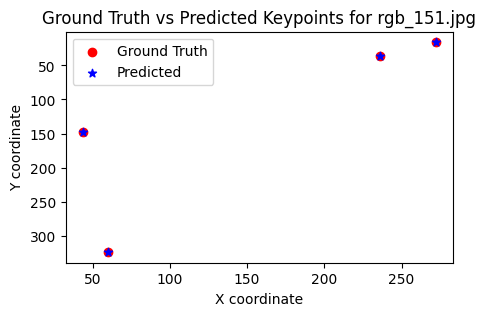

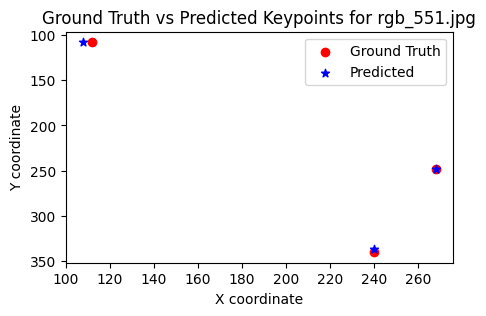

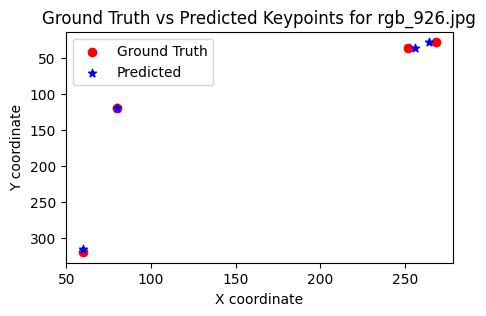

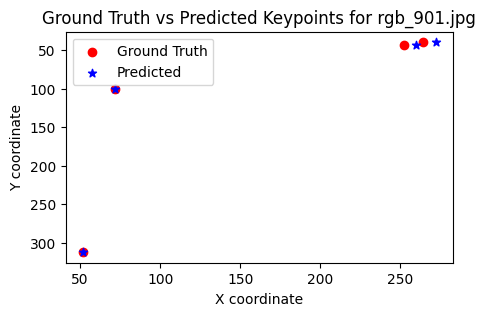

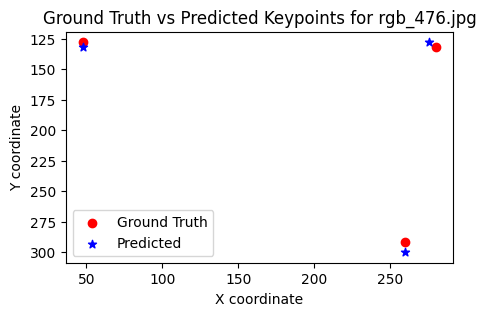

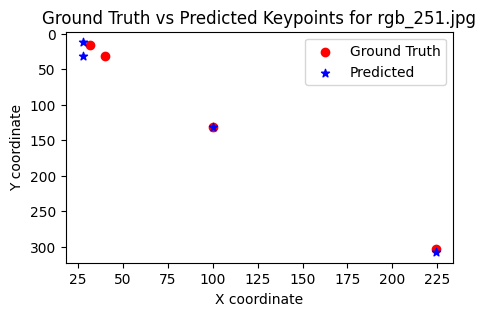

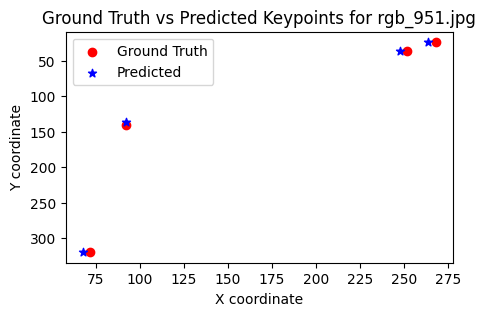

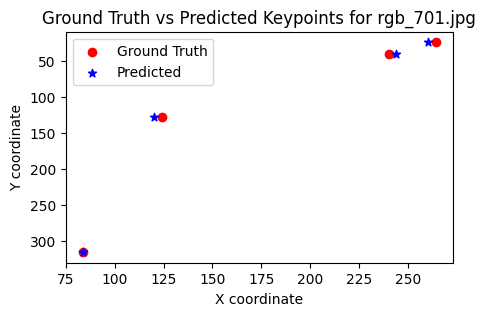

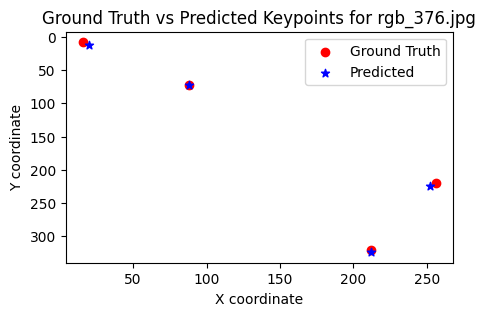

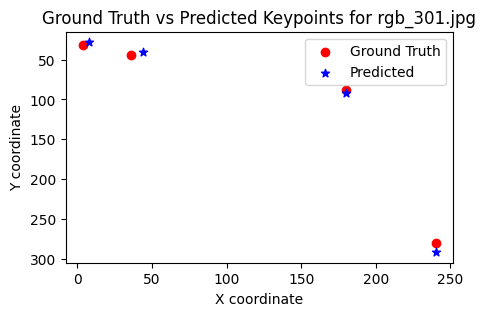

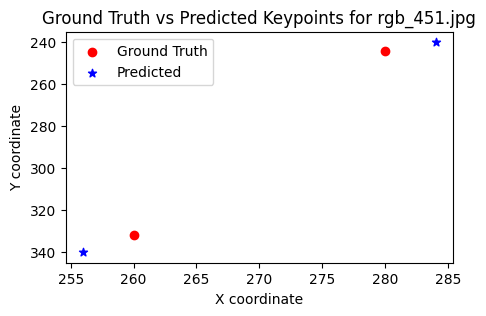

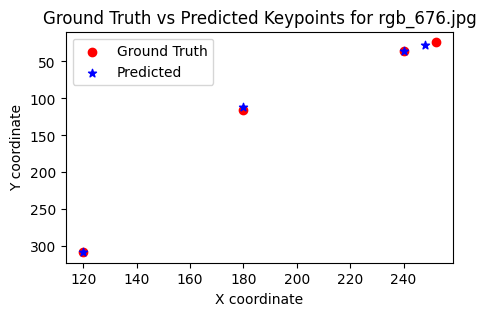

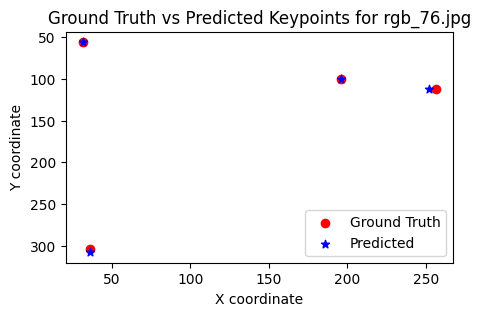

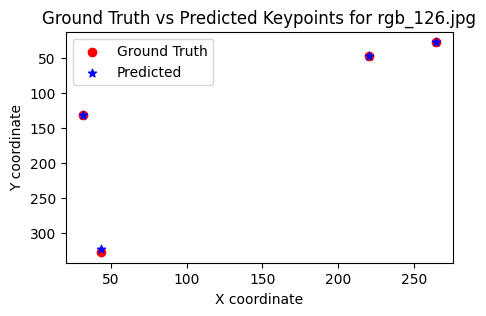

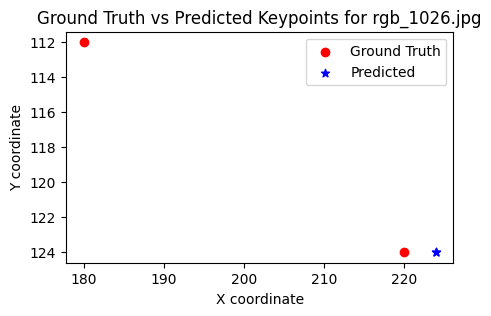

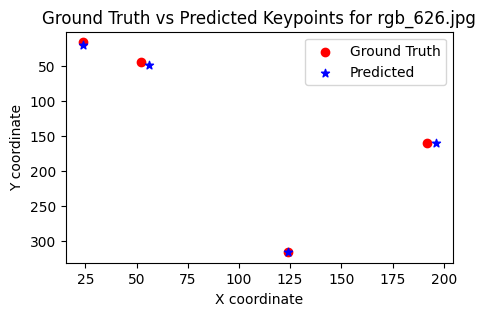

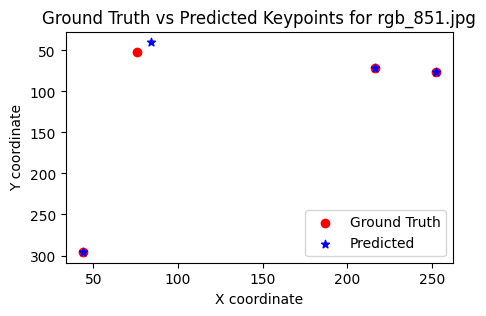

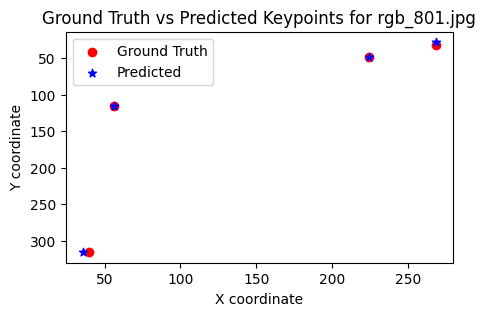

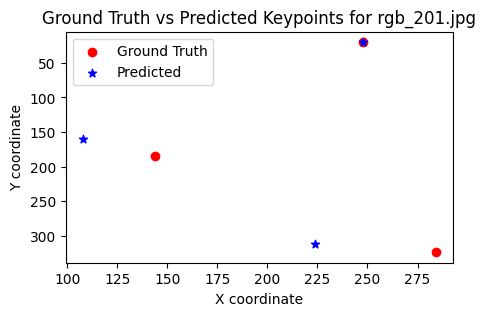

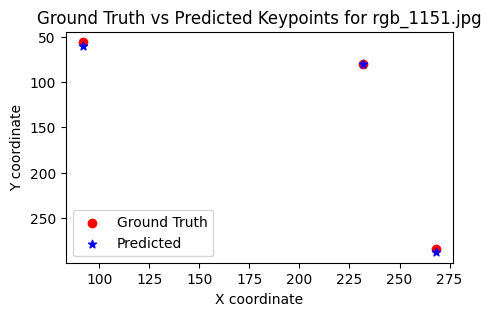

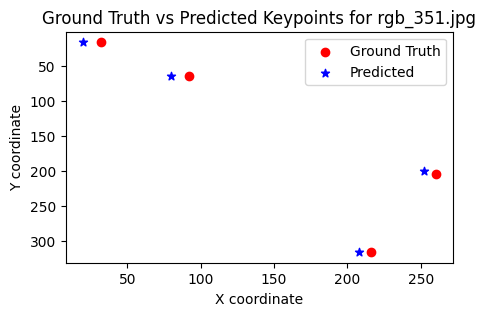

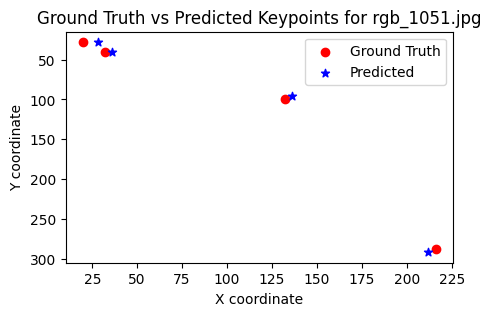

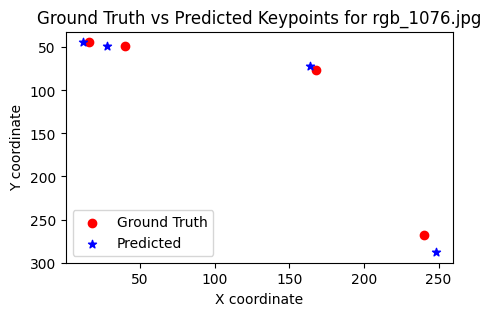

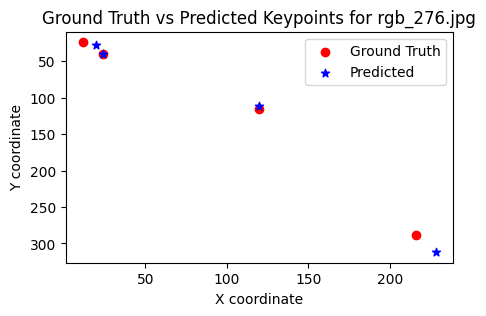

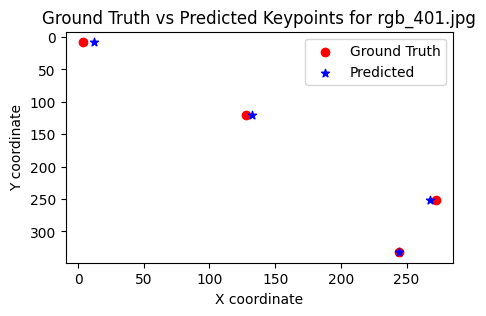

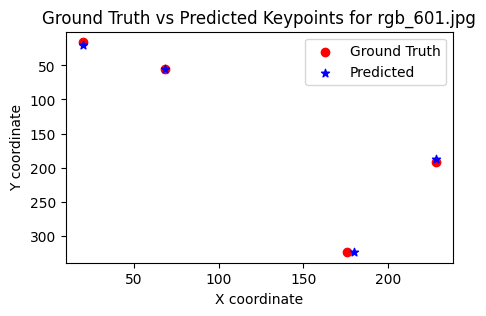

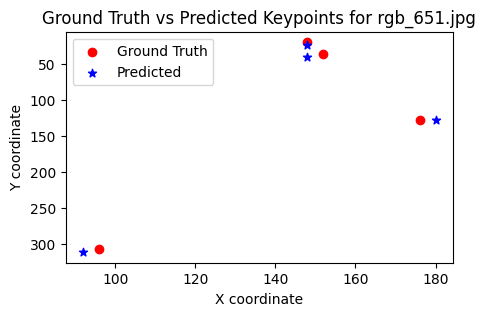

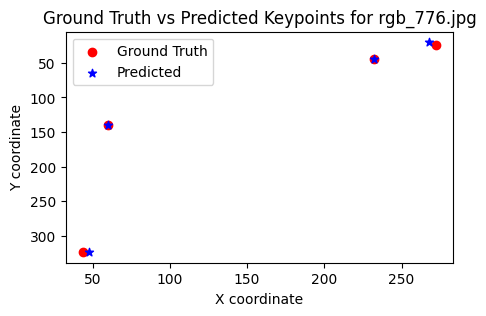

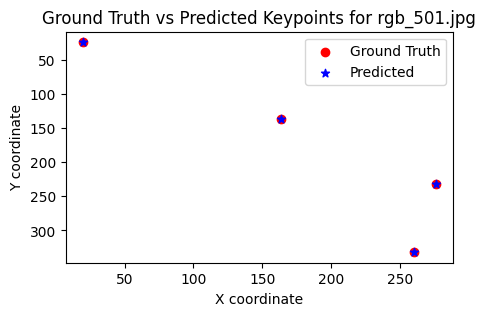

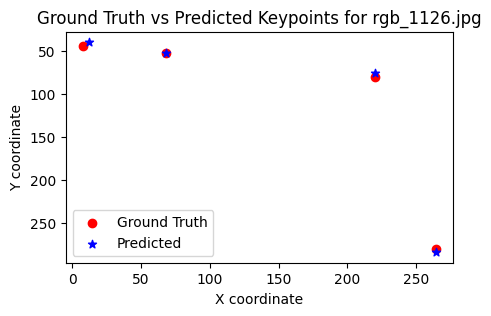

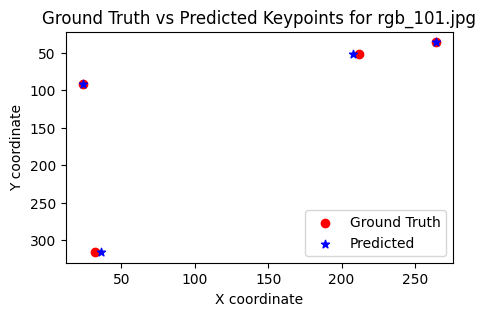

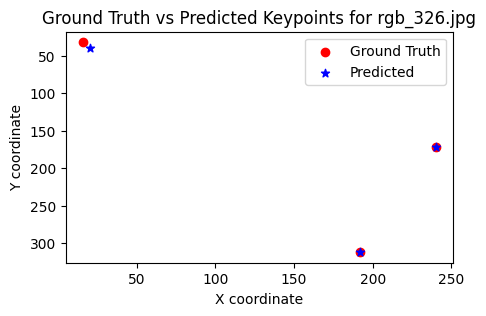

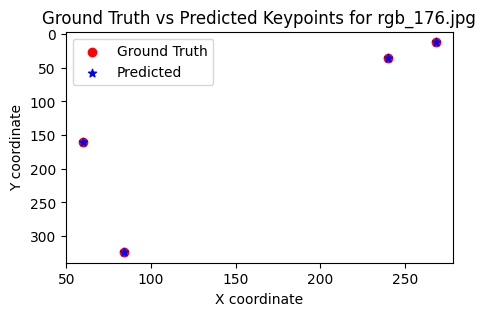

In [3]:
vis_enabled = True

df = pd.read_csv('runs/val/yolov5_detected_crane/preds.csv')

for index, row in df.iterrows():
    plot_keypoints(row, vis_enable=vis_enabled)

In [20]:
# Values
values = [0.009274744506304436, 0.01322227614443923, 0.0076121394336223355, 
          0.011253367093476338, 0.006085039920766219, 0.008973594475537494, 
          0.005580231780186263, 0.010563274702200493]

# Calculate average
average = sum(values) / len(values)

print("Average:", average)


Average: 0.0090705835070666


 ### Compare 2000-images model trained on Gt-bbox vs Yolo-bbox

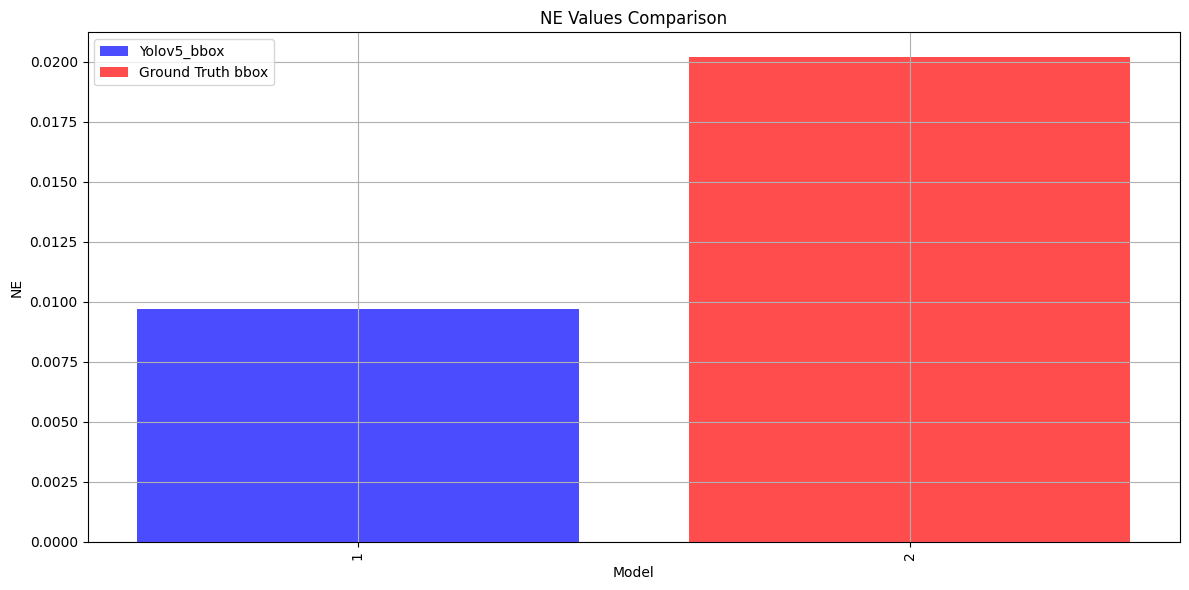

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

def compare_results(csv_file1, csv_file2, metric):
    # Read CSV files into DataFrames
    df1 = pd.read_csv(csv_file1)
    df2 = pd.read_csv(csv_file2)

    # Get NE values and corresponding file names
    ne1 = df1[metric]
    ne2 = df2[metric]
    names1 = '1'
    names2 = '2'

    # Plot bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(names1, ne1, color='blue', alpha=0.7, label='Yolov5_bbox')
    plt.bar(names2, ne2, color='red', alpha=0.7, label='Ground Truth bbox')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.title('NE Values Comparison')
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
csv_file1 = 'runs/val/yolov5_detected_crane/res_summary.csv'
csv_file2 = 'runs/val/test_1000_imgs/res_summary.csv'
metric = 'NE'
compare_results(csv_file1, csv_file2, metric)


In [ ]:
Rare resultater, får mindre NE (error) når jeg tester på YOLO detected bbox images.Fiks dette. 